In [128]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
import pandas as pd
from sqlalchemy import or_, and_
import matplotlib.pyplot as plt

In [20]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [21]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [34]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
inspector = inspect(engine)
for column in inspector.get_columns('measurement'):
    print(column['name'], column['type'])
june_temps = session.query(Measurement.date,Measurement.tobs).filter(extract('month', Measurement.date)==6).all()


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [23]:
#  3. Convert the June temperatures to a list.
june_temp_list=list(june_temps)

In [26]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temp_list, columns=['Dates','Temperatures'])

In [27]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,Temperatures
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [29]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temp = session.query(Measurement.date,Measurement.tobs).filter(extract('month',Measurement.date)==12).all()

In [30]:
# 7. Convert the December temperatures to a list
dec_temp_list = list(dec_temp)

In [31]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(dec_temp_list,columns=['Date','Temperatures'])

In [45]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()

,Temperatures
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## RESULTS

---- June Statistic Summary ---
       Temperatures
count   1700.000000
mean      74.944118
std        3.257417
min       64.000000
25%       73.000000
50%       75.000000
75%       77.000000
max       85.000000


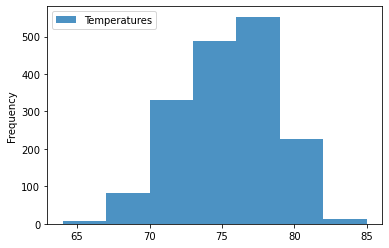

In [203]:
print('---- June Statistic Summary ---')
print(june_temp_df.describe())
june_temp_df.plot.hist(bins=7, alpha=0.8)
plt.show()


---- December Statistic Summary ---
       Temperatures
count   1517.000000
mean      71.041529
std        3.745920
min       56.000000
25%       69.000000
50%       71.000000
75%       74.000000
max       83.000000


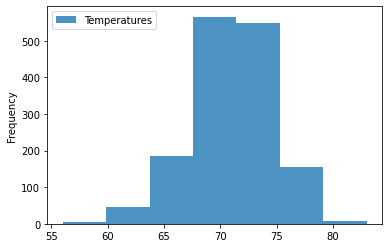

In [215]:
print('---- December Statistic Summary ---')
print(dec_temp_df.describe())
dec_temp_df.plot.hist(bins=7, alpha=0.8)
plt.show()

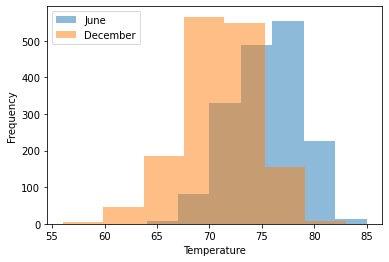

In [212]:

plt.hist(june_temp_df['Temperatures'], bins=7, alpha = 0.5, label='June')
plt.hist(dec_temp_df['Temperatures'], bins=7, alpha=0.5,label='December')
plt.legend(loc='upper left')

plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

## Additional Queries 

In [35]:
# The First Days of the Seasons 
seasons_df = pd.DataFrame()
seasons_df['Seasons of 2022'] = ['SPRING','SUMMER','FALL','WINTER']
seasons_df['Meteorological Start'] = ['Tuesday, March 1','Wednesday, June 1','Thursday, September 1','Thursday, December 1']
seasons_df['Meteorological End'] = ['Wednesday, June 1','Thursday, September 1','Thursday, December 1','Tuesday, March 1']
seasons_df

,Seasons of 2022,Meteorological Start,Meteorological End
0,SPRING,"Tuesday, March 1","Wednesday, June 1"
1,SUMMER,"Wednesday, June 1","Thursday, September 1"
2,FALL,"Thursday, September 1","Thursday, December 1"
3,WINTER,"Thursday, December 1","Tuesday, March 1"


In [216]:
#session.query(extract('year',Measurement.date)).group_by(extract('year',Measurement.date)).all()
query = session.query(extract('year',Measurement.date),extract('month',Measurement.date),Measurement.tobs).filter(extract('month',Measurement.date)>=3).filter(extract('day',Measurement.date)>=1).\
filter(extract('month',Measurement.date)<=6).filter(extract('day',Measurement.date)<=1).group_by(extract('year',Measurement.date),extract('month',Measurement.date)).order_by(Measurement.date).all()
query

SPRING = session.query(Measurement.date,Measurement.tobs).\
filter(and_(extract('month',Measurement.date)>=3,extract('day',Measurement.date)>=1)).\
filter(and_(extract('month',Measurement.date)<=5,extract('day',Measurement.date)<=31)).\
order_by(Measurement.date).all()
#SPRING


SUMMER = session.query(Measurement.date,Measurement.tobs).\
filter(and_(extract('month',Measurement.date)>=6,extract('day',Measurement.date)>=1,\
       extract('month',Measurement.date)<=8),extract('day',Measurement.date)<=31).\
order_by(Measurement.date).all()
#SUMMER

FALL = session.query(Measurement.date,Measurement.tobs).\
filter(and_(extract('month',Measurement.date)>=9,extract('day',Measurement.date)>=1,\
            extract('month',Measurement.date)<=11,extract('day',Measurement.date)<=30)).\
order_by(Measurement.date).all()
#FALL

WINTER = session.query(Measurement.date,Measurement.tobs).\
filter(or_(and_(extract('month',Measurement.date)>=12,extract('day',Measurement.date)>=1,\
            extract('month',Measurement.date)<=12,extract('day',Measurement.date)<=31),\
          and_(extract('month',Measurement.date)>=1,extract('day',Measurement.date)>=1,\
            extract('month',Measurement.date)<=2,extract('day',Measurement.date)<=29))).\
order_by(Measurement.date).all()
#WINTER
spring_df = pd.DataFrame(SPRING,columns=['Date','Temperature'])
spring_df['season'] = 'Spring'
summer_df = pd.DataFrame(SUMMER,columns=['Date','Temperature'])
summer_df['season'] = 'Summer'
fall_df = pd.DataFrame(FALL,columns=['Date','Temperature'])
fall_df['season'] = 'Fall'
winter_df =pd.DataFrame(WINTER,columns=['Date','Temperature'])
winter_df['season'] = 'Winter'

[(2010, 3, 70.0),
 (2010, 4, 74.0),
 (2010, 5, 77.0),
 (2010, 6, 78.0),
 (2011, 3, 68.0),
 (2011, 4, 74.0),
 (2011, 5, 77.0),
 (2011, 6, 77.0),
 (2012, 3, 73.0),
 (2012, 4, 73.0),
 (2012, 5, 75.0),
 (2012, 6, 76.0),
 (2013, 3, 71.0),
 (2013, 4, 63.0),
 (2013, 5, 78.0),
 (2013, 6, 79.0),
 (2014, 3, 70.0),
 (2014, 4, 73.0),
 (2014, 5, 74.0),
 (2014, 6, 79.0),
 (2015, 3, 73.0),
 (2015, 4, 76.0),
 (2015, 5, 75.0),
 (2015, 6, 78.0),
 (2016, 3, 73.0),
 (2016, 4, 77.0),
 (2016, 5, 77.0),
 (2016, 6, 76.0),
 (2017, 3, 66.0),
 (2017, 4, 76.0),
 (2017, 5, 75.0),
 (2017, 6, 79.0)]

In [107]:
season = pd.concat([spring_df,summer_df,fall_df,winter_df])
print(season.to_string(index=False))

      Date  Temperature season
2010-03-01         70.0 Spring
2010-03-01         70.0 Spring
2010-03-01         67.0 Spring
2010-03-01         67.0 Spring
2010-03-01         69.0 Spring
2010-03-01         68.0 Spring
2010-03-01         68.0 Spring
2010-03-01         66.0 Spring
2010-03-02         72.0 Spring
2010-03-02         71.0 Spring
2010-03-02         70.0 Spring
2010-03-02         69.0 Spring
2010-03-02         71.0 Spring
2010-03-02         71.0 Spring
2010-03-02         69.0 Spring
2010-03-02         67.0 Spring
2010-03-03         73.0 Spring
2010-03-03         71.0 Spring
2010-03-03         68.0 Spring
2010-03-03         71.0 Spring
2010-03-03         69.0 Spring
2010-03-03         70.0 Spring
2010-03-03         66.0 Spring
2010-03-04         70.0 Spring
2010-03-04         68.0 Spring
2010-03-04         67.0 Spring
2010-03-04         69.0 Spring
2010-03-04         65.0 Spring
2010-03-04         67.0 Spring
2010-03-04         65.0 Spring
2010-03-05         71.0 Spring
2010-03-

       Temperature
count  5139.000000
mean     72.046507
std       3.910986
min      53.000000
25%      70.000000
50%      72.000000
75%      75.000000
max      87.000000


<AxesSubplot:ylabel='Frequency'>

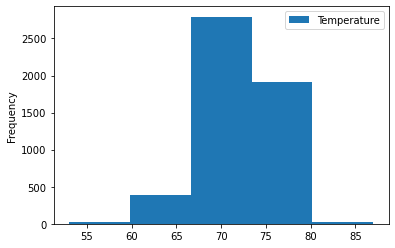

In [119]:
print(spring_df.describe())
spring_df.plot.hist(bins=5)

       Temperature
count  5033.000000
mean     75.804292
std       3.412902
min      61.000000
25%      73.000000
50%      76.000000
75%      78.000000
max      87.000000


<AxesSubplot:ylabel='Frequency'>

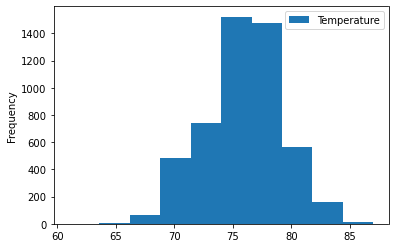

In [160]:
print(summer_df.describe())
summer_df.plot.hist()

       Temperature
count  4475.000000
mean     74.942123
std       3.774607
min      61.000000
25%      73.000000
50%      75.000000
75%      78.000000
max      87.000000


<AxesSubplot:ylabel='Frequency'>

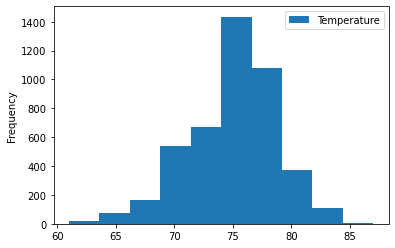

In [161]:
print(fall_df.describe())
fall_df.plot.hist()

<AxesSubplot:ylabel='Frequency'>

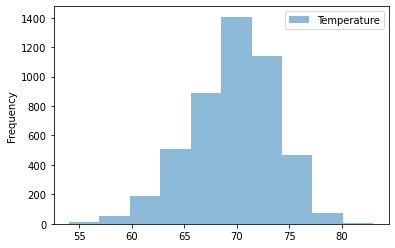

In [151]:
winter_df.describe()
winter_df.plot.hist(alpha=0.5)


<AxesSubplot:ylabel='Frequency'>

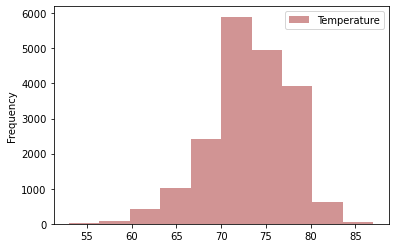

In [154]:
season.plot.hist(alpha=0.5, color='brown')

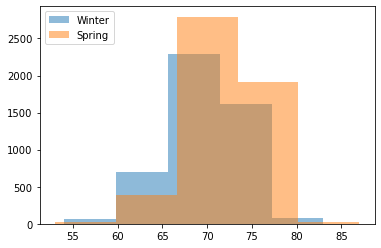

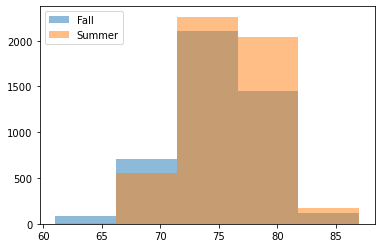

In [176]:
# calculate the summary statistics for season to generate comparisons
# https://www.lightspeedhq.com/blog/are-you-really-ready-to-open-an-ice-cream-shop/
bins= 5
plt.hist(winter_df['Temperature'], bins, alpha = 0.5, label='Winter')
plt.hist(spring_df['Temperature'], bins, alpha = 0.5, label='Spring')



plt.legend(loc='upper left')

plt.show()
plt.hist(fall_df['Temperature'], bins, alpha = 0.5, label='Fall')
plt.hist(summer_df['Temperature'], bins, alpha = 0.5, label='Summer')



plt.legend(loc='upper left')
plt.show()

<AxesSubplot:ylabel='Frequency'>

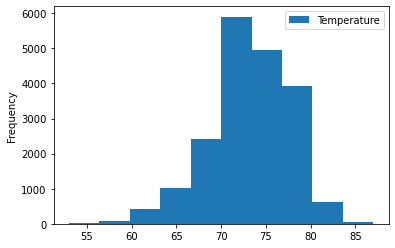

In [115]:
season.plot.hist()
data_files = ['Spring','Summer','Fall','Winter']

In [ ]:
# Is it Winter the best time to eat Ice Cream
#https://spoonuniversity.com/lifestyle/eat-ice-cream-in-winter

In [ ]:
# store trendings
# melting without worries
# flavor limit-time delights
# winter desserts come with ice cream on top